In [1]:
#import modules needed
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
import sklearn

__Read in cleaned dataset__

In [2]:
df = df = pd.read_csv('availbikes2.csv', sep=',\s+', delimiter=',')

In [3]:
df=sklearn.utils.shuffle(df)

In [4]:
df.head()

,StationNumber,available_bikes_stands,available_bikes,description,temp,temp_min,temp_max,humidity,Day,Hour
253638,31,14,6,broken clouds,8,8,8,76,Tuesday,1
328920,34,29,1,broken clouds,13,12,13,82,Monday,1
133018,96,15,15,scattered clouds,6,5,7,70,Saturday,12
183721,23,19,11,scattered clouds,12,11,13,58,Wednesday,14
146362,32,17,13,light rain,10,9,10,81,Sunday,14


__Drop columns not needed for model__:

In [5]:
df=df.drop(['temp_min', 'temp_max', 'humidity'], axis=1)

In [6]:
df

,StationNumber,available_bikes_stands,available_bikes,description,temp,Day,Hour
253638,31,14,6,broken clouds,8,Tuesday,1
328920,34,29,1,broken clouds,13,Monday,1
133018,96,15,15,scattered clouds,6,Saturday,12
183721,23,19,11,scattered clouds,12,Wednesday,14
146362,32,17,13,light rain,10,Sunday,14
...,...,...,...,...,...,...,...
151152,42,18,12,broken clouds,9,Sunday,23
330105,38,28,12,broken clouds,13,Monday,5
394997,96,16,14,few clouds,2,Saturday,5
253884,72,19,12,broken clouds,8,Tuesday,1


In [31]:
df.StationNumber.unique()

array([ 31,  34,  96,  23,  32,  45,   6,   2,  97,  80, 107,   4,  27,
        17,  69, 100,  71,  78,  63,  50,  73,  55,  56,  29,  58,  72,
        51, 106,  22,  94,  42,  77,  86,  93,  12,  47,  84,  57, 114,
        28,  19, 111,  75,  10,  66,  30,  24, 113,  15,  91,  89,  92,
        95,  37,  33,  41,  99, 103,  16,  83,  59,  74,  40, 102,  49,
        21,  11,  82,  62,   5,  76,  90, 110,  44,  48,  25, 109,  61,
        98,  13,  52, 108,  26, 112,  87,  64,  85,  43,  53,  68, 101,
       104,  38,   8,   9, 115,   7,  18,  67,  65,  88,  36,  79,  39,
       117, 116,   3,  54, 105, 507], dtype=int64)

__Define a function to encode data__

In [8]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        le = preprocessing.LabelEncoder()
        data[column_name + 'NEW'] = preprocessing.LabelEncoder().fit_transform(data[column_name])
        
    return data


__Declare Categorical Data__

In [9]:
list_le_cols=['description', 'Day']

In [11]:
df =  label_enocder(df, list_le_cols)

In [12]:
descriptionNEW_vals = df['descriptionNEW'].unique().tolist()
DayNEW_vals = df['DayNEW'].unique().tolist()

__Create Dictionaries to store the original and encoded values for each categorical Feature__

In [13]:
description_dict={}
for vals in descriptionNEW_vals:
    description_dict[vals]=df.loc[df['descriptionNEW'] == vals, 'description'].iloc[0]
description_dict

{0: 'broken clouds',
 10: 'scattered clouds',
 5: 'light rain',
 1: 'clear sky',
 2: 'few clouds',
 7: 'mist',
 8: 'moderate rain',
 6: 'light snow',
 9: 'overcast clouds',
 3: 'heavy intensity rain',
 4: 'light intensity drizzle'}

In [15]:
DayDict={}
for vals in DayNEW_vals:
    DayDict[vals]=df.loc[df['DayNEW'] == vals, 'Day'].iloc[0]
DayDict  

{5: 'Tuesday',
 1: 'Monday',
 2: 'Saturday',
 6: 'Wednesday',
 3: 'Sunday',
 0: 'Friday',
 4: 'Thursday'}

In [16]:
#drop the un encoded cat columns
df = df.drop(['Day', 'description'], axis=1)

In [17]:
df

,StationNumber,available_bikes_stands,available_bikes,temp,Hour,descriptionNEW,DayNEW
253638,31,14,6,8,1,0,5
328920,34,29,1,13,1,0,1
133018,96,15,15,6,12,10,2
183721,23,19,11,12,14,10,6
146362,32,17,13,10,14,5,3
...,...,...,...,...,...,...,...
151152,42,18,12,9,23,0,3
330105,38,28,12,13,5,0,1
394997,96,16,14,2,5,2,2
253884,72,19,12,8,1,0,5


__Seperate Dataframe into a list of df's grouped by station number__

In [18]:
dfseperated = [x for _, x in df.groupby('StationNumber')]
        

In [19]:
dfseperated[0]

,StationNumber,available_bikes_stands,available_bikes,temp,Hour,descriptionNEW,DayNEW
392942,2,16,4,2,0,1,2
171352,2,6,14,14,14,2,5
294319,2,19,1,4,6,10,0
137081,2,10,10,5,19,8,2
399399,2,18,2,11,13,10,2
...,...,...,...,...,...,...,...
421785,2,17,3,3,8,0,1
98749,2,14,6,12,17,0,6
373794,2,13,7,8,13,9,4
272319,2,12,7,12,12,10,6


__Declare Target Values__

In [20]:
predict = 'available_bikes'

In [21]:
predictStands='available_bikes_stands'

__Store Station Numbers in List - Visualisation Purposes__

In [22]:
stations=[]
for index in range(len(dfseperated)):
    stations+=[dfseperated[index].StationNumber.unique().tolist()]
len(stations)

110

__KNeighbors Classifier for Bikes Available - Each station model stored in a dict__

In [44]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
bikesDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes', 'available_bikes_stands'], 1))
    y = np.array(dfseperated[index][predict])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
   
    acc = model.score(x_test, y_test)
#     print("Station Number:", stationNum) 
#     print("Accuracy: ",acc*100)    
    bikesDict[stationNum]=model
#     filename=(str(stationNum) + "Bikes.pkl")
#     with open(filename, "wb") as f:
#         pickle.dump(model, f)


__KNeighbors Classifier for Stands Available - Each station model stored in a dict__

In [45]:
import pickle
StandsDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes_stands', 'available_bikes'], 1))
    y = np.array(dfseperated[index][predictStands])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
#     print("Station Number:", stationNum)
#     print("Accuracy: ",acc*100)    
    
    StandsDict[stationNum]=model
#     filename=(str(stationNum) + "Stands.pkl")
#     with open(filename, "wb") as f:
#         pickle.dump(model, f)


__Demonstrating Model for Station 507__

In [34]:
model_Station117=StandsDict[507]

In [35]:
predictions = model_Station117.predict(x_test)

In [41]:
# for x in range(len(predictions)):
#     print("Predicted: ", predictions[x], "Actual: ", y_test[x])

c:\users\jelly\anaconda3\envs\comp30830\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jelly\anaconda3\envs\comp30830\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


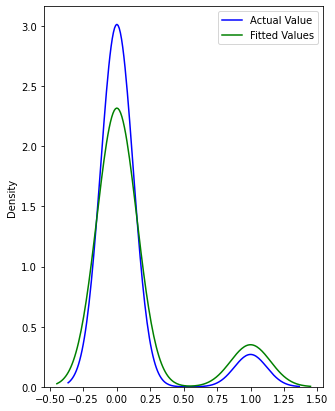

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(predictions, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()
